# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [17]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [4]:
experimentN = 'exp3'

In [5]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ecar/experiment_3/normalized/ecar_3expNorm.csv"
ecar_expNorm = pandas.read_csv(path, sep = ";")
ecar_expNorm = ecar_expNorm.rename(columns = {'Unnamed: 0':'Time'})
ecar_expNorm = ecar_expNorm.apply(lambda x: x.str.replace(',','.'))
ecar_expNorm = ecar_expNorm.astype(float)
print(ecar_expNorm.shape)
ecar_expNorm.head(2)

(15, 61)
Wall time: 45.8 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.309470,2.165771,2.516371,2.114851,3.666524,3.196208,3.573912,2.045912,1.395215,2.176292,...,2.284040,2.627394,2.44734,2.606064,1.619806,1.139803,1.829839,0.920416,1.929551,2.518332
1,7.762102,1.893485,2.271483,1.908031,3.468583,2.903727,3.484147,1.853609,1.424403,2.073699,...,1.973883,2.424138,2.49731,2.450774,1.135390,1.044054,1.662434,0.919658,1.661038,2.362479


In [6]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

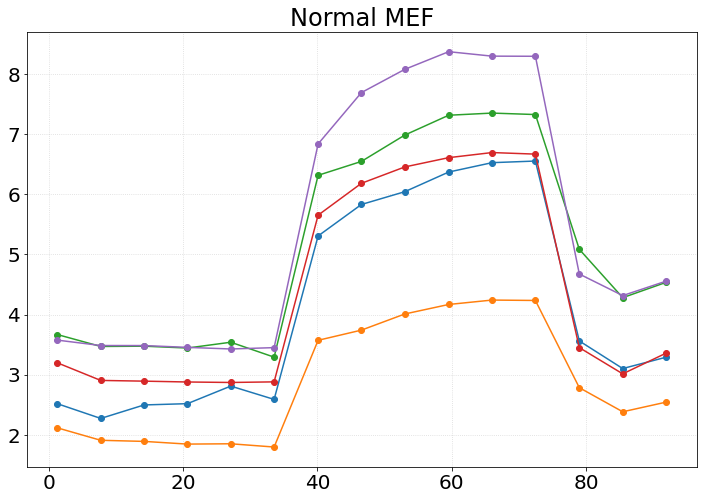

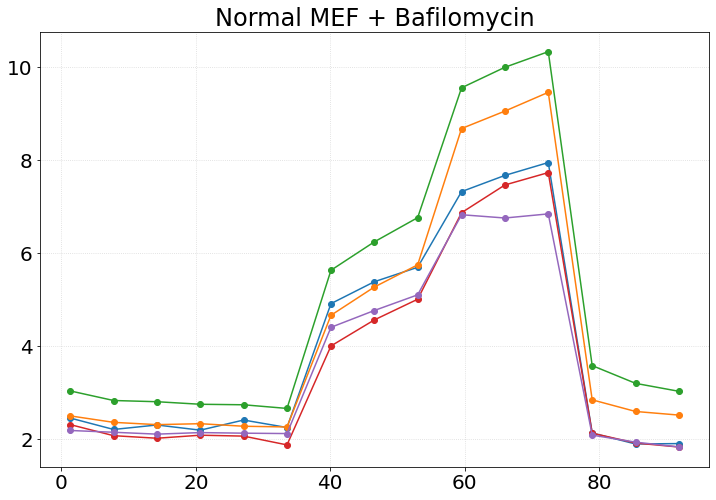

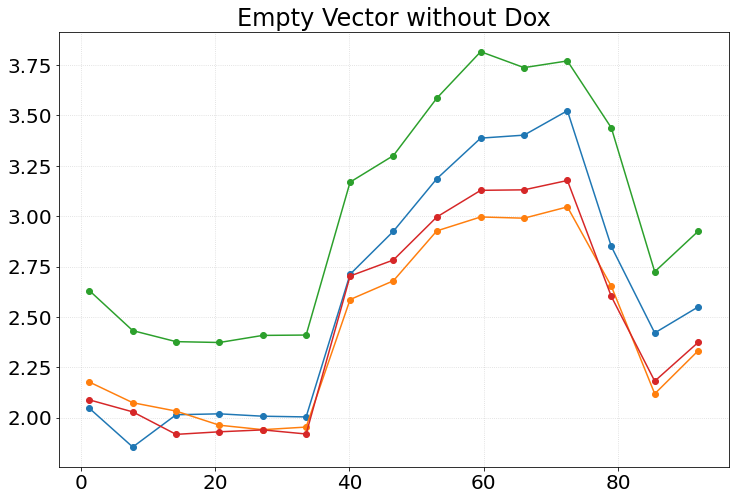

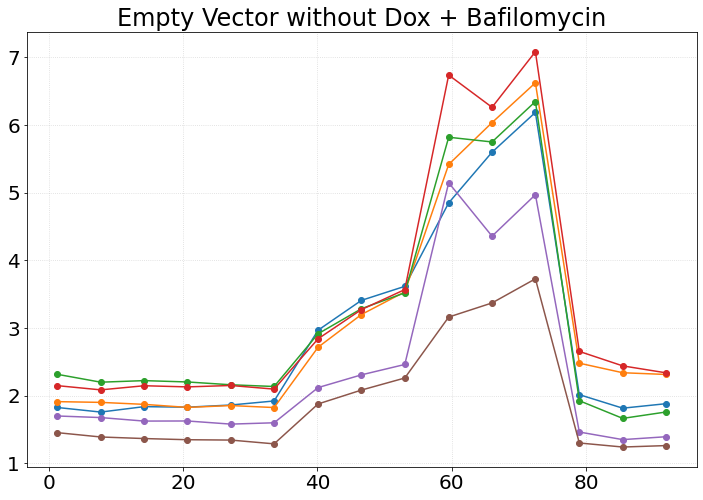

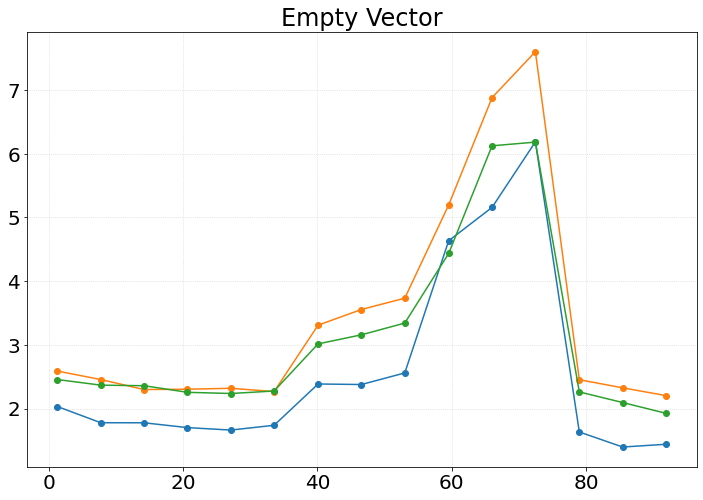

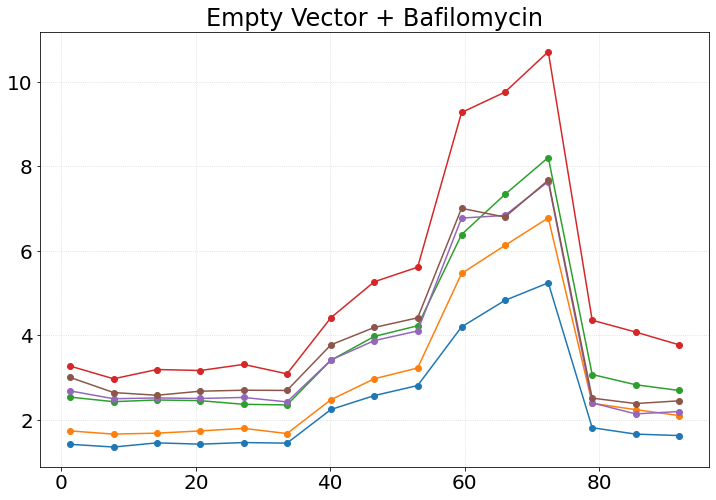

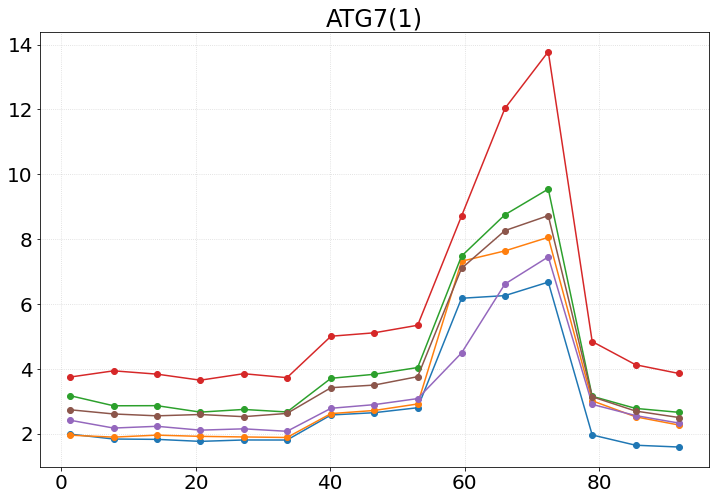

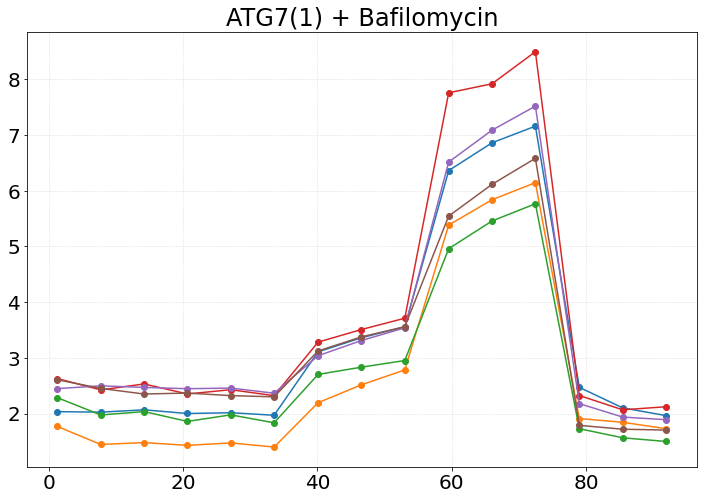

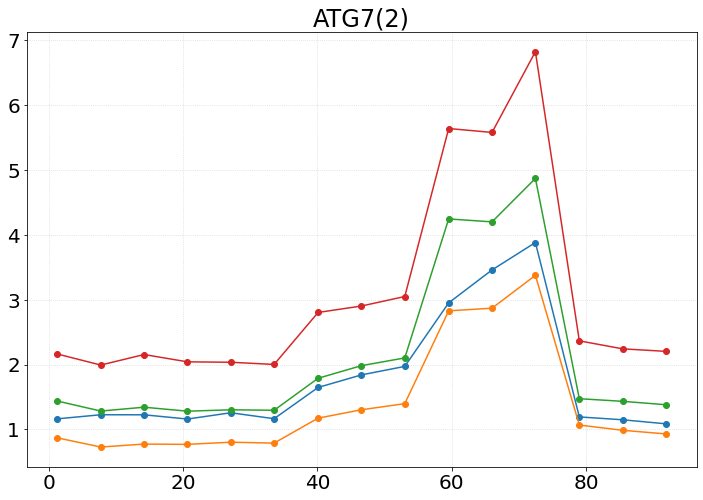

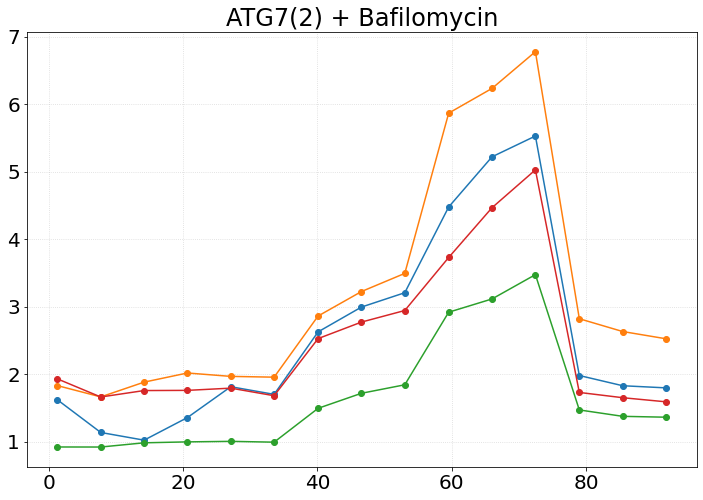

<Figure size 864x576 with 0 Axes>

In [18]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [19]:
#define the wells for each condition
normal = ['C02','D02','E02','F02','G02']
ev_nodox = ['B03','D03','E03','G03']
ev = ['C04','E04','F04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06']

normal_baf = ['B07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','D11','E11','F11']

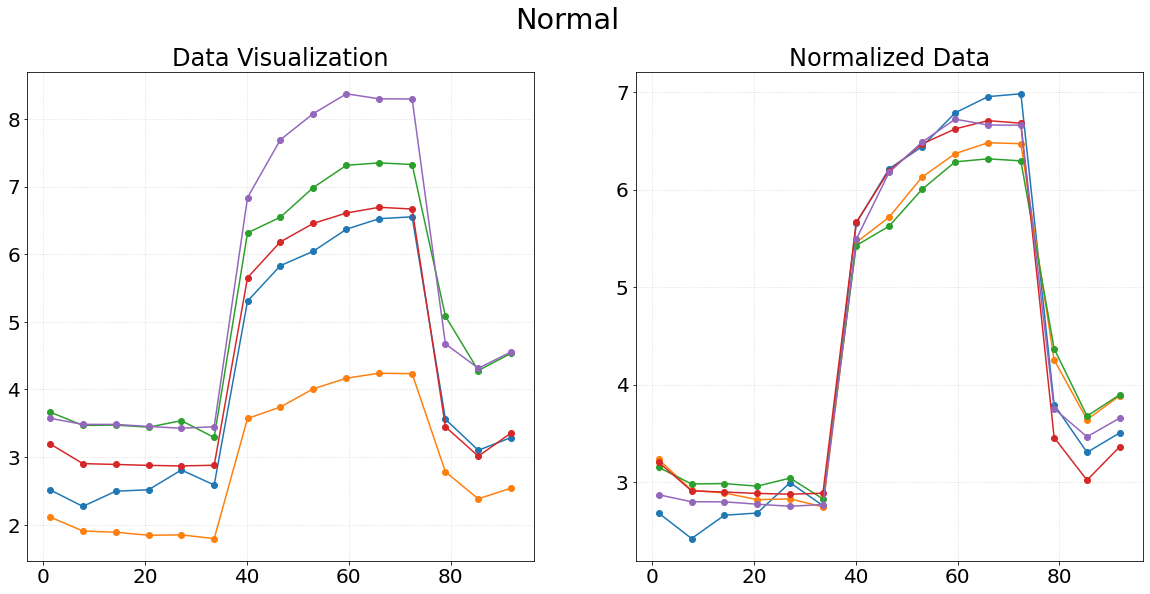

<Figure size 864x576 with 0 Axes>

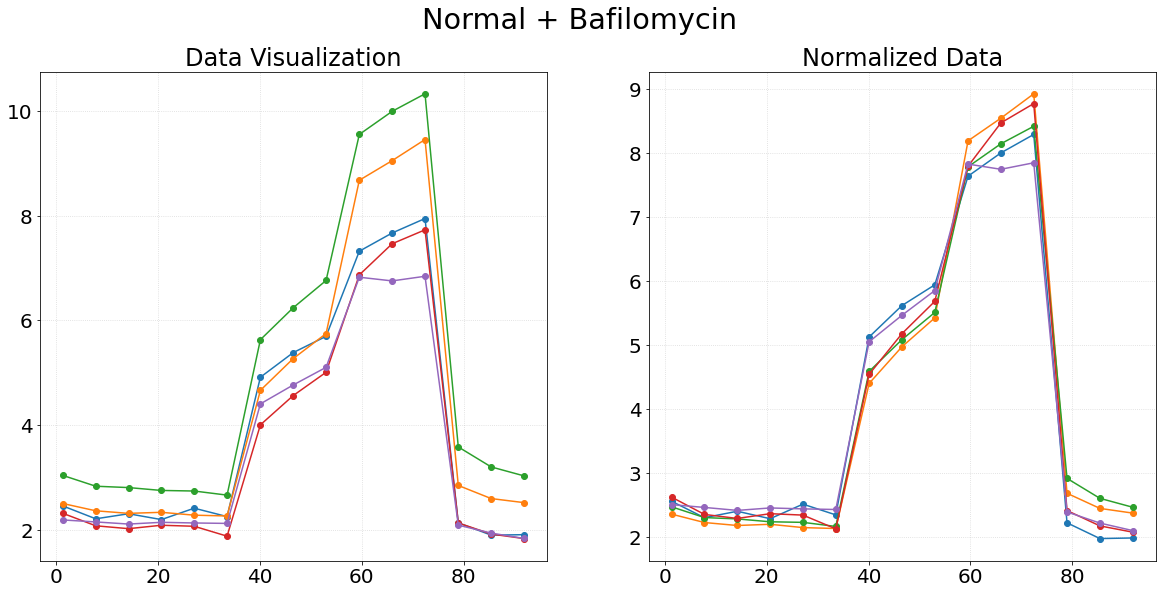

<Figure size 864x576 with 0 Axes>

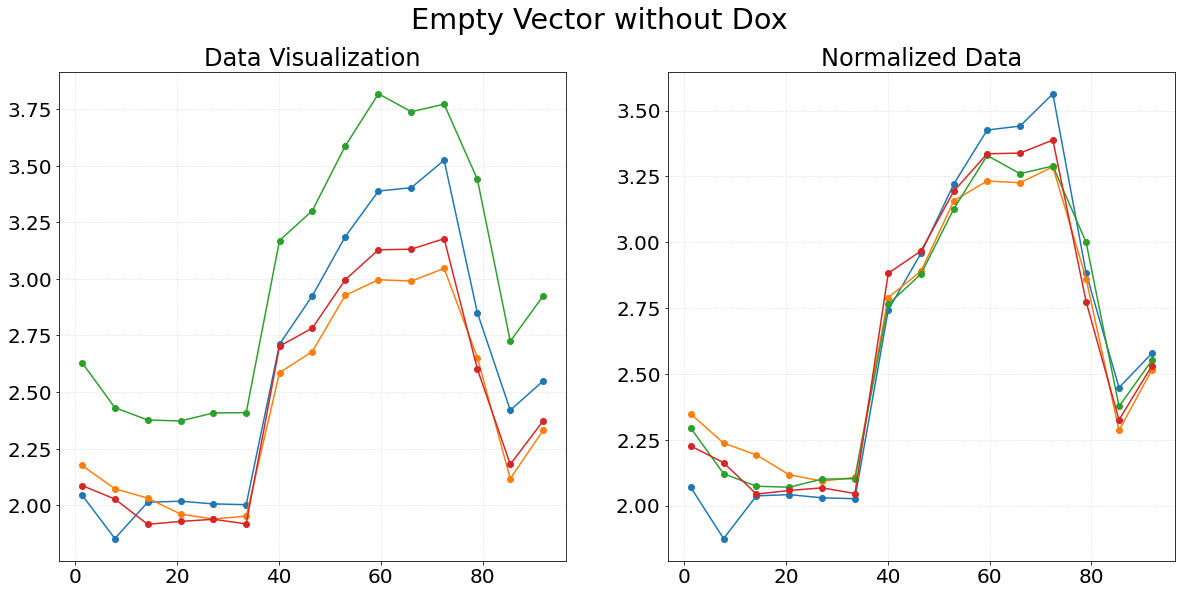

<Figure size 864x576 with 0 Axes>

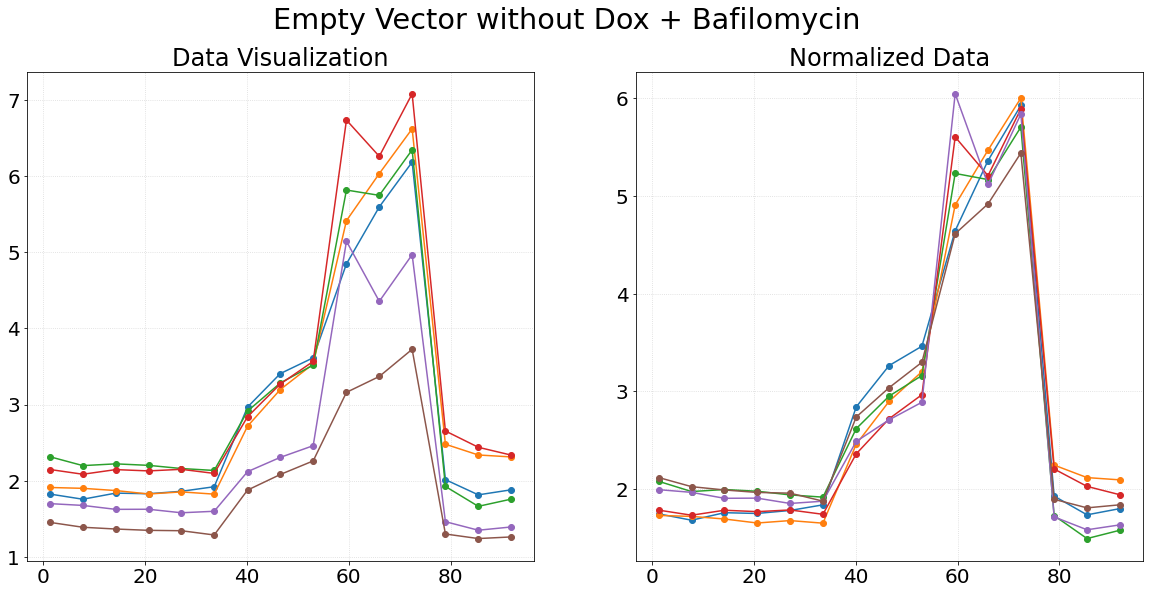

<Figure size 864x576 with 0 Axes>

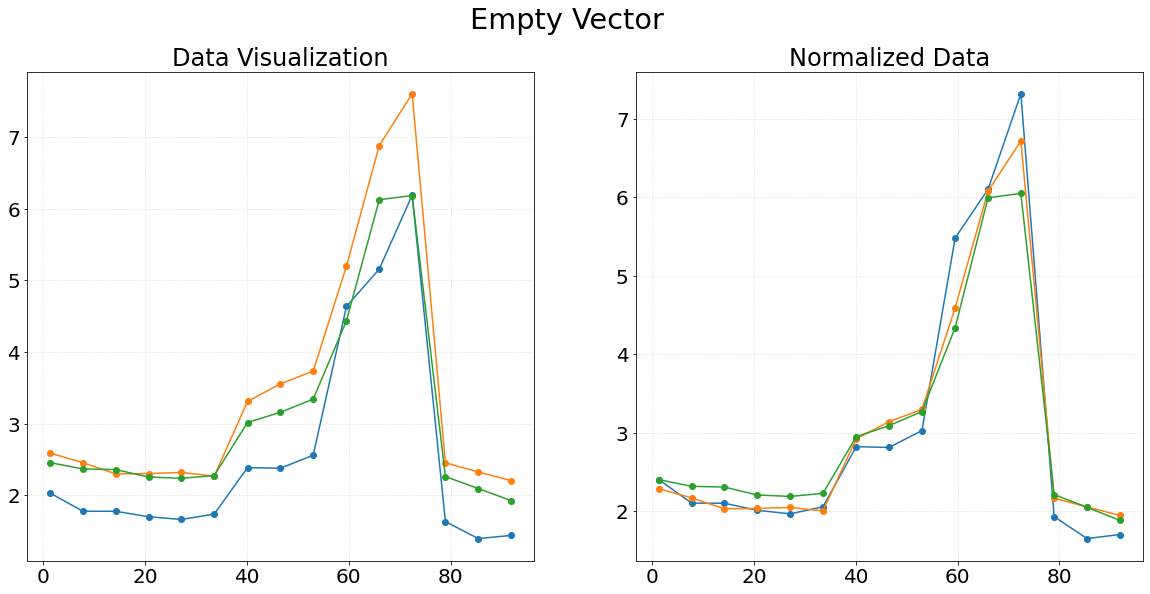

<Figure size 864x576 with 0 Axes>

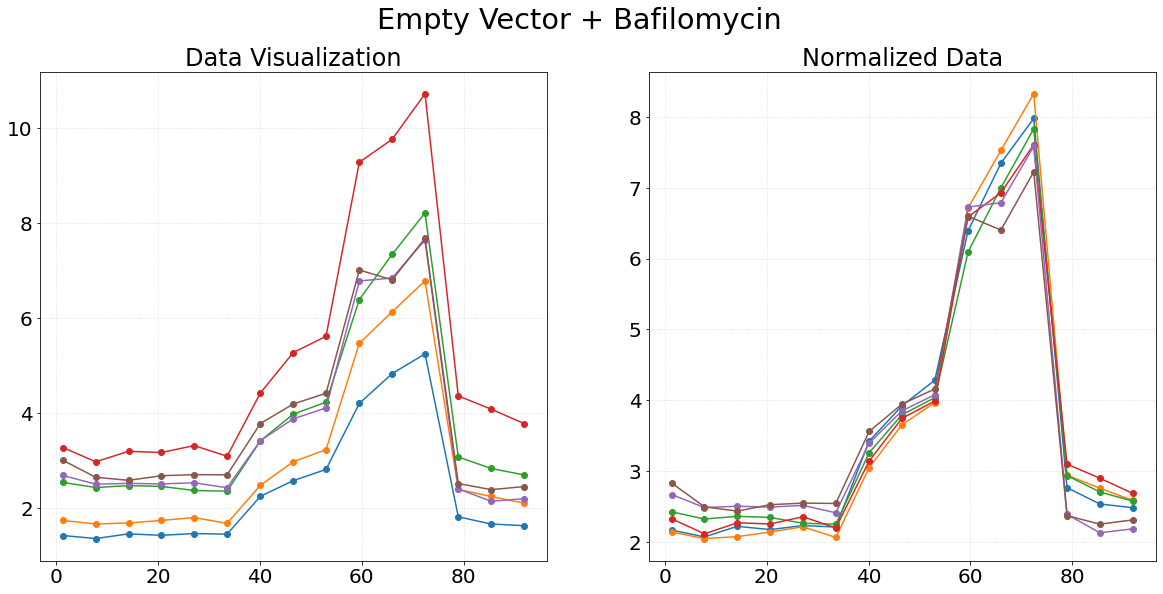

<Figure size 864x576 with 0 Axes>

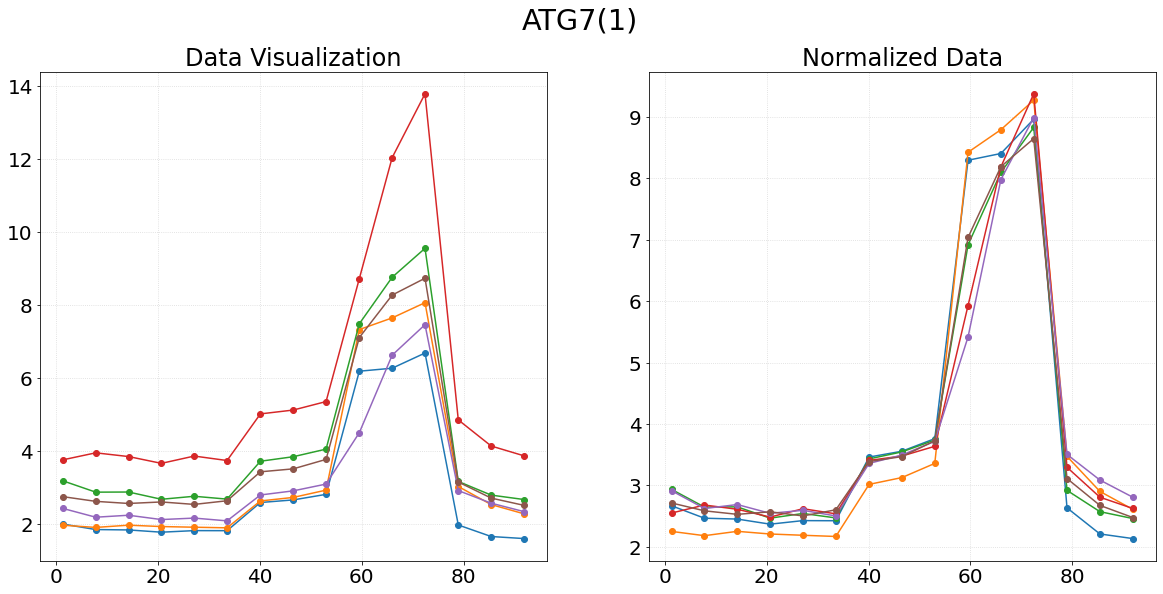

<Figure size 864x576 with 0 Axes>

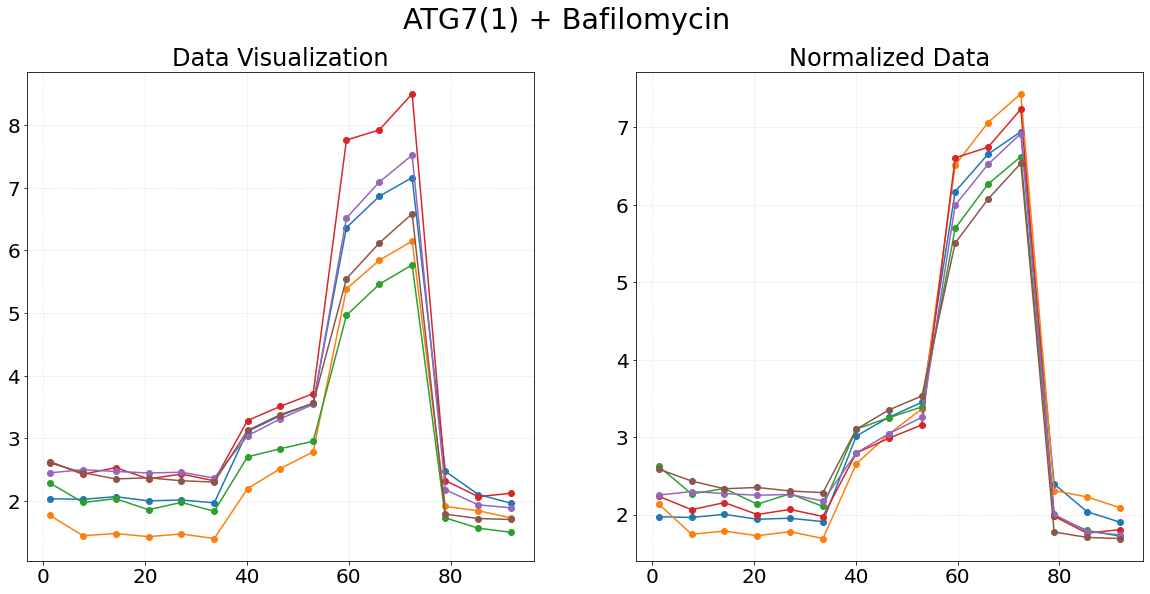

<Figure size 864x576 with 0 Axes>

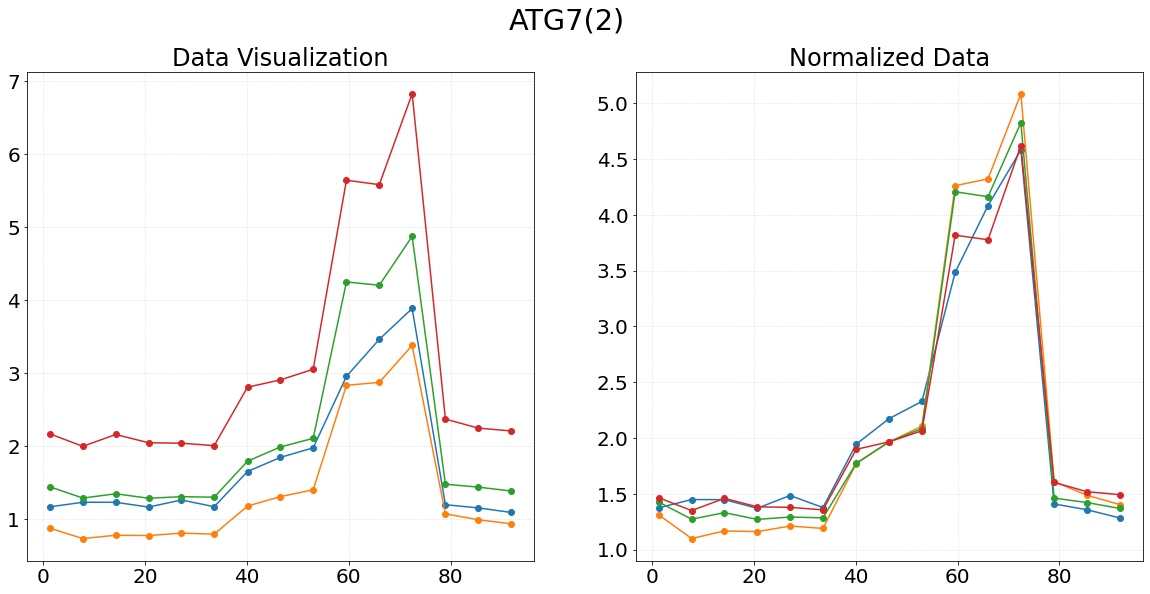

<Figure size 864x576 with 0 Axes>

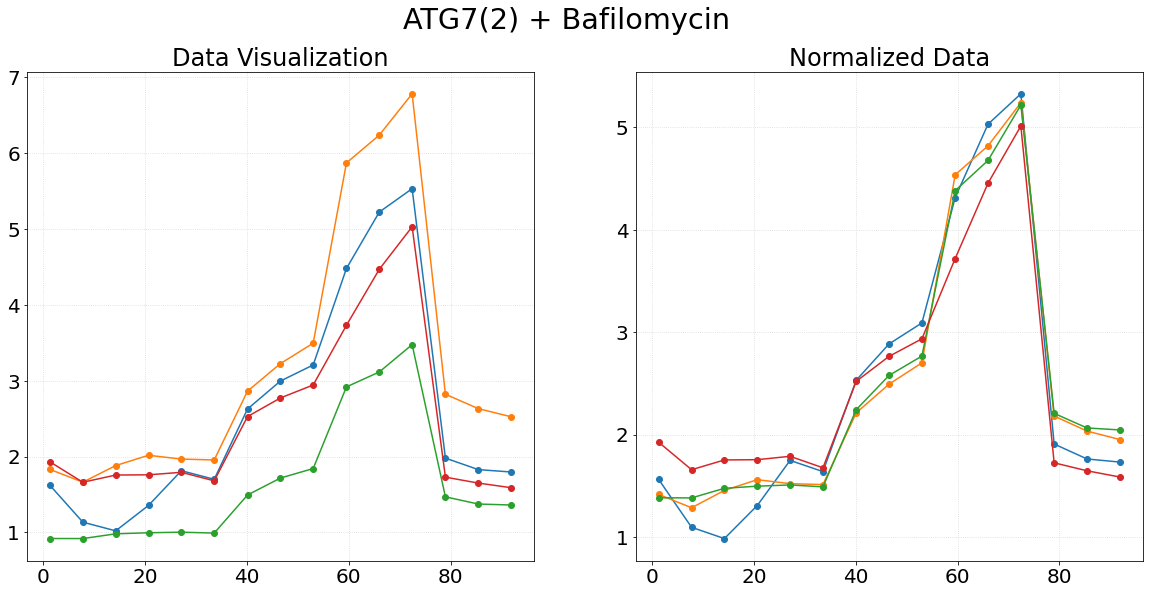

<Figure size 864x576 with 0 Axes>

In [20]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal'], [normal_baf, 'Normal + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ecar_expNorm[data[0]].mean()
    general_mean = ecar_expNorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ecar_expNorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ecar_expNorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

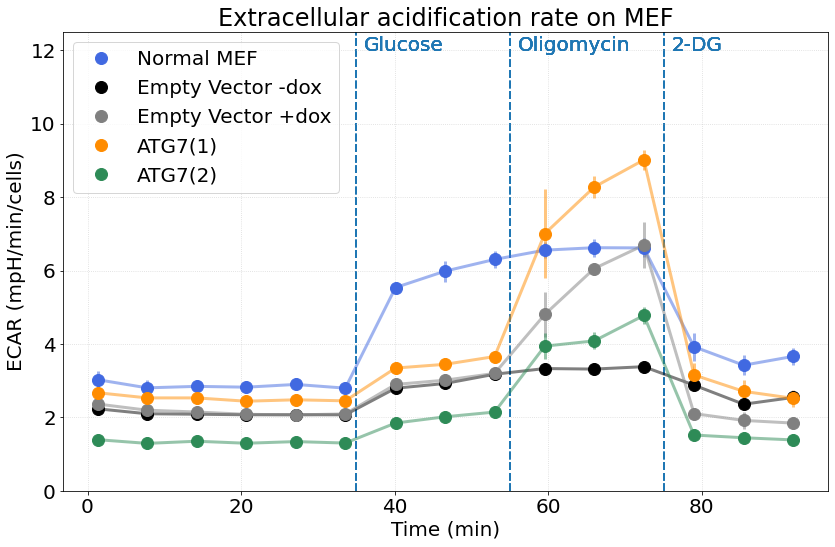

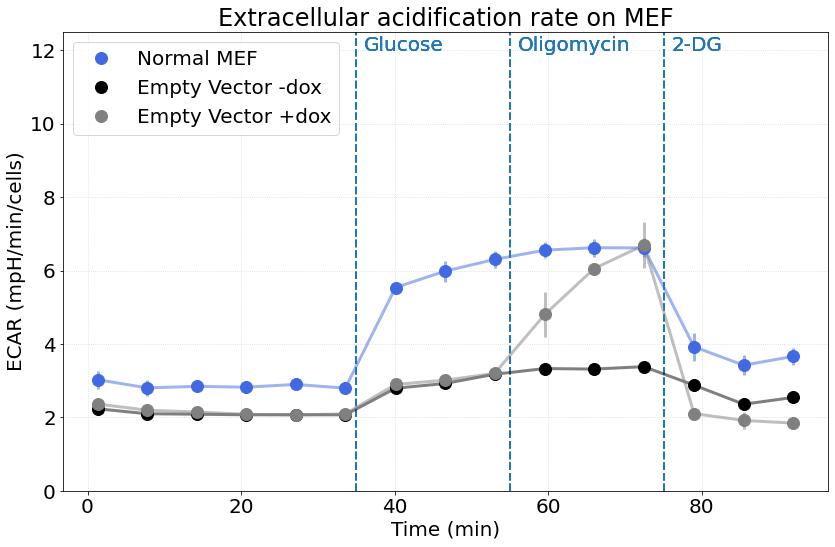

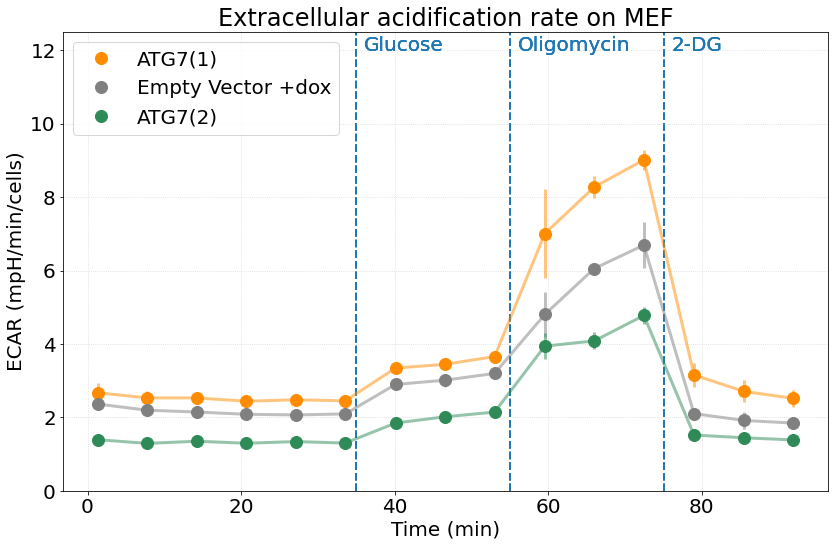

<Figure size 864x576 with 0 Axes>

In [21]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[wt1, 'ATG7(1)', 'darkorange'],
            [ev, 'Empty Vector +dox', "grey"],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 12, 'Glucose', color='tab:blue')
        matplotlib.pyplot.text(56, 12, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(76, 12, '2-DG', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate on MEF')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (mpH/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 12.5])
        matplotlib.pyplot.tight_layout()
    plt.show()
    plt.clf()

In [22]:
ecar_expNorm.Time

0      1.309470
1      7.762102
2     14.210693
3     20.658075
4     27.108013
5     33.558458
6     40.102374
7     46.546482
8     53.000464
9     59.533737
10    65.984421
11    72.436794
12    78.972026
13    85.430570
14    91.886274
Name: Time, dtype: float64

In [23]:
#data preparation + TRY TO ADD BASAL LEVEL DF
sample_labels = wt2, wt1, ev, ev_nodox, normal
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox','Normal MEF'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue","black"

stats_data_basal = ecar_expNorm.iloc[6:9, :]
stats_data_max = ecar_expNorm.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'glycolysis', 'max_glycolysis'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :6]

    path = 'ATG7/MEF/Seahorse_results/seahorse_ECAR/dataframes_for_input/'
    file_name = f'ecar_{experimentN}_df_dmso_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    5.535991           2.792429           2.903622  3.352344  1.854505
1    5.997580           2.921890           3.030260  3.450781  2.008544
2    6.313137           3.173552           3.211561  3.657224  2.131387
   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    6.565784           3.332243           4.755863  6.879403  3.917849
1    6.620909           3.315245           6.054740  8.259677  4.028403
2    6.614536           3.379476           6.657952  9.038534  4.739559


In [24]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,6)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Normal'
# data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
# data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

# #graph
# seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('ECAR (mpH/min/cells)')
# plt.xlabel('')
# plt.title('Extracellular acidification rate on MEF', x=.55)
# plt.grid(alpha = 0.5)

# # # save
# # path = 'ATG7/Seahorse_results/seahorse_ECAR/'
# # plt.savefig(output_file_directory+path+'ecar_exp_3_normal.svg')

# + Baf

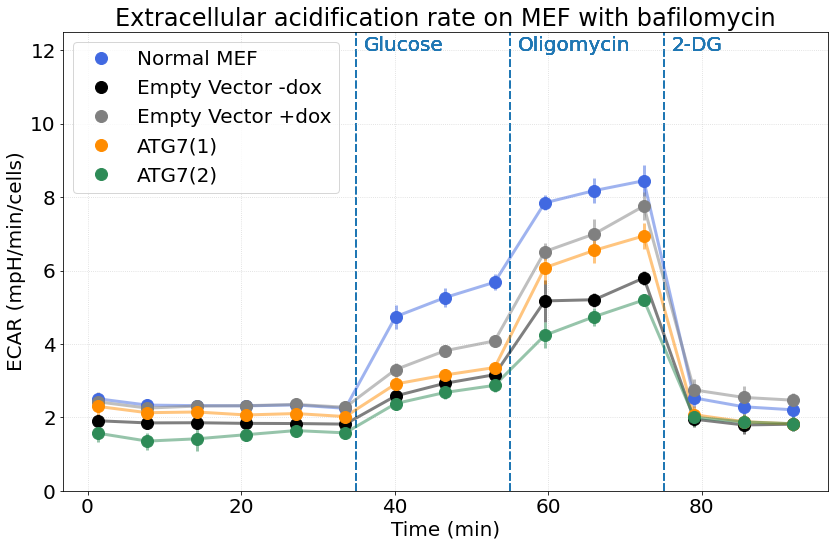

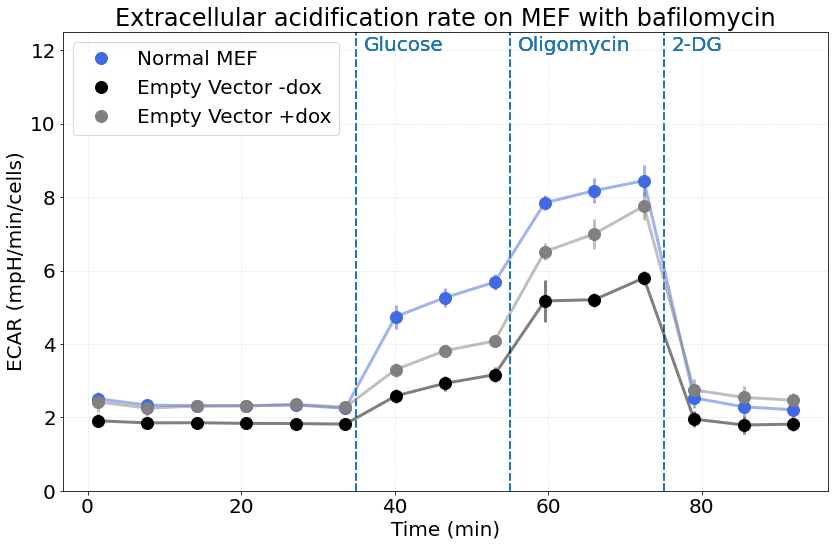

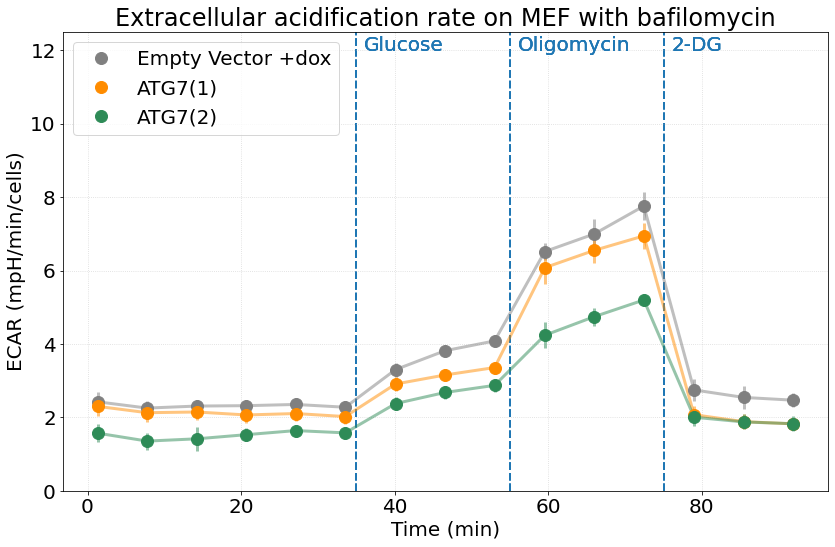

<Figure size 864x576 with 0 Axes>

In [25]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN

all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_baf, 'Empty Vector +dox', "grey"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 12, 'Glucose', color='tab:blue')
        matplotlib.pyplot.text(56, 12, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(76, 12, '2-DG', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate on MEF with bafilomycin')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (mpH/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 12.5])
        matplotlib.pyplot.tight_layout()
        
    plt.show()
    plt.clf()

In [26]:
#data preparation + TRY TO ADD BASAL LEVEL DF
sample_labels = wt2_baf, wt1_baf, ev_baf, ev_nodox_baf, normal_baf
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox','Normal MEF'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue","black"

stats_data_basal = ecar_expNorm.iloc[6:9, :]
stats_data_max = ecar_expNorm.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'glycolysis', 'max_glycolysis'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :6]

    path = 'ATG7/MEF/Seahorse_results/seahorse_ECAR/dataframes_for_input/'
    file_name = f'ecar_{experimentN}_df_baf_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    4.725952           2.570955           3.294471  2.908002  2.376618
1    5.246993           2.924072           3.811819  3.150615  2.675839
2    5.665134           3.158367           4.069709  3.350071  2.870736
   Normal MEF  Empty Vector -dox  Empty Vector +dox   ATG7(1)   ATG7(2)
0    7.849888           5.188145           6.521133  6.088248  4.247337
1    8.187707           5.228177           6.950882  6.547525  4.758275
2    8.461249           5.822747           7.713078  6.945900  5.201399


In [27]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,6)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Normal'
# data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
# data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

# #graph
# seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('ECAR (mpH/min/cells)')
# plt.xlabel('')
# plt.title('Extracellular acidification rate on MEF with bafilomycin', x=.55)
# plt.grid(alpha = 0.5)

# # save
# path = 'ATG7/Seahorse_results/seahorse_ECAR/'
# plt.savefig(output_file_directory+path+'ecar_exp_3_bafilomycin.svg')